##### <center> MINISTERE DE L’ENSEIGNEMENT SUPERIEUR  ET DE LA RECHERCHE SCIENTIFIQUE <br/> UNIVERSITE DE SOUSSE </center>

### <center>Institut Supérieur d’Informatique et de Technique de Communication </center>           <img src="isitcom.png"> 
### <center>المعهد العالي للإعلامية و تقنيات الاتصال بحمام سوسة</center>

## <center>Analyse Numérique</center>

# <center> <span style="color:blue"> TP2 Interpolation Numérique
</span></center>
<hr>

###  <center> Réalisé par : <br> Mrad Haythem  <br> 2DNI1</center> <hr>

#### <center> Année Universitaire 2020 – 2021 </center>
<hr>

## exercice 1
<hr>

In [38]:
##importantion: 
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
def PR(x,y,c):
    s=[]
    l=[]
    n=len(x)
    for i in range(n):
        l=[ c-k for k in x ]
        for j in range (n):
            if j==i : 
                l[j]=1
            else : 
                l[j]= l[j]/(x[i]-x[j])
        s.append(y[i]*np.prod(l))
    return np.sum(s)
                

In [28]:
x=[1,2,3,4]
y=[-1,0,2,1]
for i in x: 
    print(PR(x,y,i))

-1.0
0.0
2.0
1.0


##### Polynome d'interpolation de Lagrange:
<hr> 
Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par 
<hr>
$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [29]:
x=[1,2,3,4]
y=[1,2,3,4]
for i in x: 
    print(PR(x,y,i))

1.0
2.0
3.0
4.0


2) Que contient le vecteur LL après la fin de la boucle kk .

In [36]:
def PR1(x,y,c):
    s=[]
    l=[]
    n=len(x)
    for i in range(n):
        l=[ c-k for k in x ]
        for j in range (n):
            if j==i : 
                l[j]=1
            else : 
                l[j]= l[j]/(x[i]-x[j])
        s.append(y[i]*np.prod(l))
    print(l)
    return np.sum(s)               

In [37]:
x=[1,2,3,4]
y=[-1,0,2,1]
for i in x: 
    print(PR1(x,y,i))

[0.0, -0.5, -2.0, 1]
-1.0
[0.3333333333333333, 0.0, -1.0, 1]
0.0
[0.6666666666666666, 0.5, 0.0, 1]
2.0
[1.0, 1.0, 1.0, 1]
1.0


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

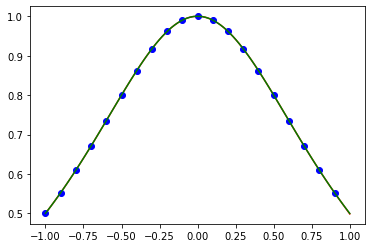

In [35]:
f=lambda x : 1/(1+x**2)
x=np.arange(-1,1,0.1)
y=f(x)
t=np.linspace(-1,1,100)
pt=[]
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')
plt.show()

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.
<hr>

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$. 
 <hr>

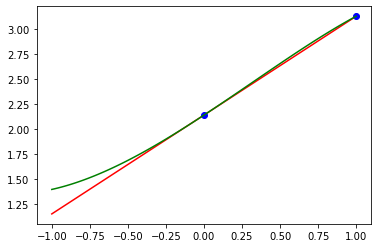

In [55]:
f=lambda x : math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
x=np.arange(0,2)
f1=np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
pt=[]
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,f1(t),'g')
plt.show()

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

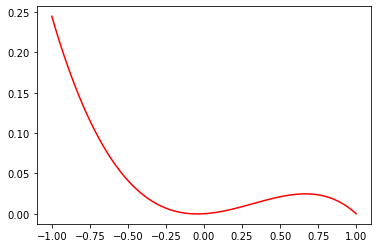

In [57]:
plt.plot(t,f1(t)-pt,'r')
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

In [93]:
def FPIL(N):
    X=np.linspace(-5,5,N)
    f= lambda x:1/(1+x**2)
    Y=f(X);
    p=np.polyfit(X,Y,N-1)
    t=np.linspace(-5,5,1000)
    plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
    plt.title(["Interpolation Equidistante avec N=",N])

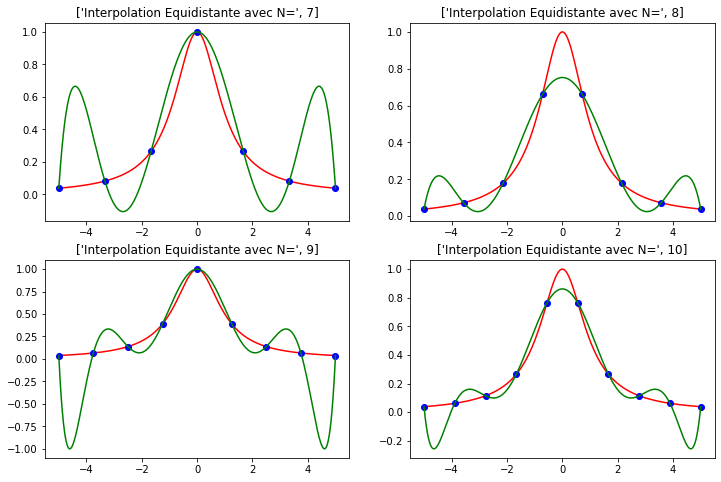

In [94]:
fig = plt.figure(1, figsize=(12, 8))
plt.subplot(221)
FPIL(7)
plt.subplot(222)
FPIL(8)
plt.subplot(223)
FPIL(9)
plt.subplot(224)
FPIL(10)
plt.show()

<hr>
2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).
<hr>

In [106]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [107]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

In [108]:
def FPIL2(N):
    Yt=[]
    f= lambda x:1/(1+x**2)
    Xt=tcheb(-7,7,N)
    for i in Xt:
        Yt.append(f(i))
    pt=np.polyfit(Xt,Yt,N-1)
    plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
    plt.title(["Interpolation Tchebycheff avec N=",N])

<ipython-input-109-cde30f0e0704>:3: RankWarning: Polyfit may be poorly conditioned
  FPIL2(10)
<ipython-input-109-cde30f0e0704>:5: RankWarning: Polyfit may be poorly conditioned
  FPIL2(11)
<ipython-input-109-cde30f0e0704>:7: RankWarning: Polyfit may be poorly conditioned
  FPIL2(16)
<ipython-input-109-cde30f0e0704>:9: RankWarning: Polyfit may be poorly conditioned
  FPIL2(17)


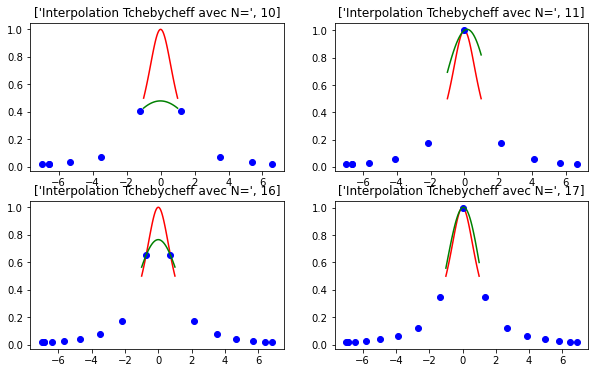

In [109]:
fig = plt.figure(1, figsize=(10, 6))
plt.subplot(221)
FPIL2(10)
plt.subplot(222)
FPIL2(11)
plt.subplot(223)
FPIL2(16)
plt.subplot(224)
FPIL2(17)
plt.show()